<a href="https://colab.research.google.com/github/denistoo749/house-prices-advanced-regression-techniques-project/blob/main/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the sales price for each house using Machine Learning
1. **Problem defition**
>predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.
2. **Data**
>The data is downloaded from the Kaggle House Prices - Advanced Regression Techniques https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
3. **Evaluation**
>The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices. For more on the evaluation of this project check: www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/evaluation
4. **Features**
>Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Unzip file
!unzip '/content/drive/MyDrive/House Prices - Advanced Regression Techniques/house-prices-advanced-regression-techniques.zip' -d '/content/drive/MyDrive/House Prices - Advanced Regression Techniques/'

Archive:  /content/drive/MyDrive/House Prices - Advanced Regression Techniques/house-prices-advanced-regression-techniques.zip
  inflating: /content/drive/MyDrive/House Prices - Advanced Regression Techniques/data_description.txt  
  inflating: /content/drive/MyDrive/House Prices - Advanced Regression Techniques/sample_submission.csv  
  inflating: /content/drive/MyDrive/House Prices - Advanced Regression Techniques/test.csv  
  inflating: /content/drive/MyDrive/House Prices - Advanced Regression Techniques/train.csv  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [4]:
df = pd.read_csv('/content/drive/MyDrive/House Prices - Advanced Regression Techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

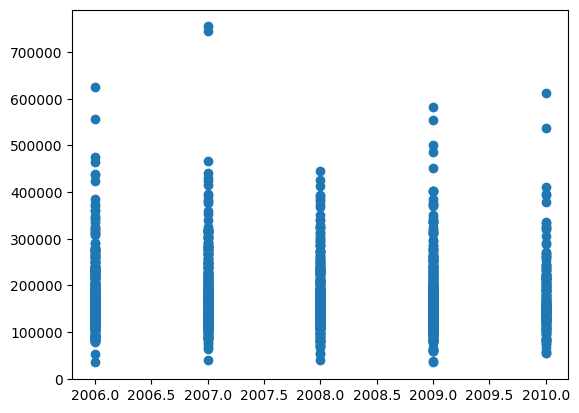

In [7]:
fig, ax = plt.subplots()
ax.scatter(df['YrSold'][:], df['SalePrice'][:]);

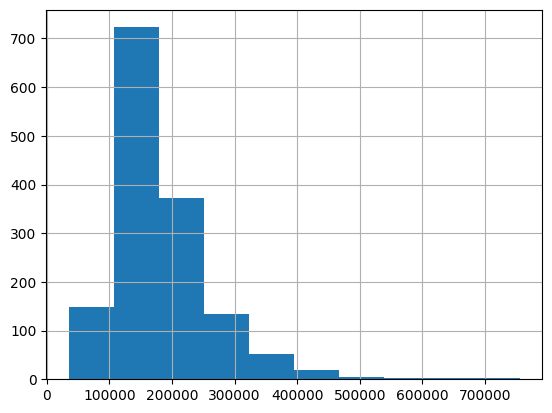

In [8]:
df.SalePrice.hist();

In [9]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
MoSold,2,5,9,2,12
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal


In [10]:
# Sort values by YrSold
df.sort_values(by=['YrSold'], inplace=True, ascending=True)
df.YrSold.head()

781     2006
1219    2006
281     2006
569     2006
1220    2006
Name: YrSold, dtype: int64

In [11]:
# Make a copy
df_tmp = df.copy()
df_tmp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
781,782,60,RL,65.0,7153,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,175900
1219,1220,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,91500
281,282,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,New,Partial,185000
569,570,90,RL,NaN,7032,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,135960
1220,1221,20,RL,66.0,7800,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Abnorml,115000


In [12]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 781 to 1284
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallCond

## Converting string to categories
One way we can turn all of our data into numbers is by converting them into pandas catgories.

In [13]:
pd.api.types.is_string_dtype(df_tmp['SaleType'])

True

In [14]:
# Find the columns which contains strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
Heating
HeatingQC
CentralAir
KitchenQual
Functional
PavedDrive
SaleType
SaleCondition


In [15]:
# This will turn all the string value into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [16]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 781 to 1284
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   int64

In [17]:
pd.api.types.is_string_dtype(df_tmp['SaleType'])

True

In [18]:
df_tmp.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Fill missing values
## Filling missing numerical values first

In [19]:
# Check if there is any numerical values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [20]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [21]:
# Fill numeric with median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_tmp[label+'_is_missing'] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [22]:
# Checks if there's  any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [23]:
df_tmp.MasVnrArea_is_missing.value_counts()

MasVnrArea_is_missing
False    1452
True        8
Name: count, dtype: int64

In [24]:
df_tmp.isna().sum()

Id                        0
MSSubClass                0
MSZoning                  0
LotFrontage               0
LotArea                   0
                         ..
SaleCondition             0
SalePrice                 0
LotFrontage_is_missing    0
MasVnrArea_is_missing     0
GarageYrBlt_is_missing    0
Length: 84, dtype: int64

## Filling and turning categorical variables into numbers

In [25]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [26]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing values
        df_tmp[label+'_is_missing'] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

In [27]:
pd.Categorical(df_tmp['Fence']).codes + 1

array([1, 1, 1, ..., 1, 3, 1], dtype=int8)

In [28]:
pd.Categorical(df_tmp['GarageCond']).codes

array([5, 0, 5, ..., 5, 5, 5], dtype=int8)

In [29]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 781 to 1284
Columns: 127 entries, Id to SaleCondition_is_missing
dtypes: bool(46), float64(3), int64(35), int8(43)
memory usage: 571.7 KB


In [30]:
df_tmp.head().T

,781,1219,281,569,1220
Id,782,1220,282,570,1221
MSSubClass,60,160,20,90,20
MSZoning,4,5,2,4,4
LotFrontage,65.0,21.0,60.0,69.0,66.0
LotArea,7153,1680,7200,7032,7800
...,...,...,...,...,...
PoolQC_is_missing,True,True,True,True,True
Fence_is_missing,True,True,True,True,True
MiscFeature_is_missing,True,True,True,True,True
SaleType_is_missing,False,False,False,False,False


In [31]:
df_tmp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
781,782,60,4,65.0,7153,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1219,1220,160,5,21.0,1680,2,0,4,4,1,...,True,True,True,True,False,True,True,True,False,False
281,282,20,2,60.0,7200,2,2,4,4,1,...,False,False,False,False,False,True,True,True,False,False
569,570,90,4,69.0,7032,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
1220,1221,20,4,66.0,7800,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False


### Splitting data into train/validation sets using YrSold column

In [32]:
df_tmp.YrSold

781     2006
1219    2006
281     2006
569     2006
1220    2006
        ... 
353     2010
1322    2010
162     2010
158     2010
1284    2010
Name: YrSold, Length: 1460, dtype: int64

In [33]:
df_tmp.YrSold.value_counts()

YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: count, dtype: int64

In [34]:
# Split the data into training and validation
df_val = df_tmp[df_tmp.YrSold == 2010]
df_train = df_tmp[df_tmp.YrSold !=2010]

len(df_val), len(df_train)

(175, 1285)

In [35]:
# Split the data into x and y
x_train, y_train = df_train.drop('SalePrice', axis=1), df_train.SalePrice
x_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val.SalePrice

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1285, 126), (175, 126), (1285,), (175,))

In [38]:
# Create an evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

def rmsle(y_test, y_preds):
    """"
    Calculate root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {'Training MAE': mean_squared_log_error(y_train, train_preds),
              'Valid MAE': mean_squared_log_error(y_valid, val_preds),
              'Training RMSLE': rmsle(y_train, train_preds),
              'Valid RMSLE': rmsle(y_valid, val_preds),
              'Training R^2': r2_score(y_train, train_preds),
              'Valid R^2': r2_score(y_valid, val_preds)}
    return scores

Testing our model on a subset (to tune the hyperparameters)

In [39]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                             max_samples=1000)

In [40]:
%%time
# Cutting down on the max number of samples each estimator can see improves training time
model.fit(x_train, y_train)

CPU times: user 3.08 s, sys: 30.2 ms, total: 3.11 s
Wall time: 3.08 s


RandomForestRegressor(max_samples=1000, n_jobs=-1, random_state=42)

In [41]:
show_scores(model)

{'Training MAE': 0.005367561627835138,
 'Valid MAE': 0.019041376144121568,
 'Training RMSLE': 0.07326364465295962,
 'Valid RMSLE': 0.1379904929483244,
 'Training R^2': 0.9686731739406423,
 'Valid R^2': 0.8841936040358409}

Hyperparameter tuning with RandomizedSearchCV

In [42]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RadomForestRegressor hyperparameters
rf_grid = {'n_estimators': np.arange(10, 100, 10),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
           'max_features': [0.5, 1, 'sqrt', 'auto'],
           'max_samples': [1000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=5,
                              cv=5,
                              verbose=True)

# Instantiate RandomizedSearchCV model
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

CPU times: user 13.7 s, sys: 313 ms, total: 14 s
Wall time: 10.9 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [43]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_samples': 1000,
 'max_features': 'sqrt',
 'max_depth': None}

In [44]:
# Evaluate the RansomizedSearchCV model
show_scores(rs_model)

{'Training MAE': 0.0071371147662015,
 'Valid MAE': 0.024064399786812476,
 'Training RMSLE': 0.08448144628379357,
 'Valid RMSLE': 0.15512704402138422,
 'Training R^2': 0.9568700735042693,
 'Valid R^2': 0.8582803684746161}

## Train the model with the best hyperparameters
**Note:** These were found after 100 iterations of RandomizedSearchCV

In [45]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                   random_state=42)

# Fit the model ideal model
ideal_model.fit(x_train, y_train)

CPU times: user 537 ms, sys: 10.8 ms, total: 548 ms
Wall time: 318 ms


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [46]:
# Scores for ideal-model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 0.008648216378900998,
 'Valid MAE': 0.020422180855333875,
 'Training RMSLE': 0.0929957868879069,
 'Valid RMSLE': 0.14290619600050194,
 'Training R^2': 0.9514780377169427,
 'Valid R^2': 0.8746674805351314}

In [47]:
# Scores on rs_model (only on 1000 examples)
show_scores(rs_model)

{'Training MAE': 0.0071371147662015,
 'Valid MAE': 0.024064399786812476,
 'Training RMSLE': 0.08448144628379357,
 'Valid RMSLE': 0.15512704402138422,
 'Training R^2': 0.9568700735042693,
 'Valid R^2': 0.8582803684746161}

In [48]:
## Make predictions on test data
df_test = pd.read_csv('/content/drive/MyDrive/House Prices - Advanced Regression Techniques/test.csv',
                      low_memory=False)

df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [49]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())

        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1

    return df

In [50]:
# Process the test data
df_test = preprocess_data(df_test)
df_test.head()

<ipython-input-49-21dd9f87d732>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label+"_is_missing"] = pd.isnull(content)
<ipython-input-49-21dd9f87d732>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label+"_is_missing"] = pd.isnull(content)
<ipython-input-49-21dd9f87d732>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageCars_is_missing,GarageArea_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,False,True,True,False,False,False
2,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
3,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,False,True,True,True,False,False


In [52]:
# Make predictions on updated test data
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- BsmtFinSF1_is_missing
- BsmtFinSF2_is_missing
- BsmtFullBath_is_missing
- BsmtHalfBath_is_missing
- BsmtUnfSF_is_missing
- ...
